# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# montando a base de treino

ids = pd.read_csv('/content/drive/MyDrive/subject_train.txt', header=None)

features = pd.read_csv('/content/drive/MyDrive/features.txt', sep=' ', names=['index', 'variaveis'])

df = pd.read_excel('/content/drive/MyDrive/X_train_excel.xlsx', header=None)

df.columns = list(features['variaveis'])

df['ID'] = ids

df.to_csv('/content/drive/MyDrive/X_train_comp.csv')

In [4]:
# montando a base de teste

ids = pd.read_csv('/content/drive/MyDrive/subject_test.txt', header=None)

features = pd.read_csv('/content/drive/MyDrive/features.txt', sep=' ', names=['index', 'variaveis'])

df = pd.read_excel('/content/drive/MyDrive/X_test_excel.xlsx', header=None)

df.columns = list(features['variaveis'])

df['ID'] = ids

df.to_csv('/content/drive/MyDrive/X_test_comp.csv')

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [5]:
%%time

X_train = pd.read_csv('/content/drive/MyDrive/X_train_comp.csv')[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

y_train = pd.read_csv('/content/drive/MyDrive/y_train.txt', header=None)

X_test = pd.read_csv('/content/drive/MyDrive/X_test_comp.csv')[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

y_test = pd.read_csv('/content/drive/MyDrive/y_test.txt', header=None)


CPU times: user 1.16 s, sys: 59 ms, total: 1.22 s
Wall time: 2.08 s


In [6]:
# 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20

clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(X_train, y_train)

In [7]:
# 2.2.A Calcule os ccp_alphas

caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [8]:
# 2.2.B Certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.

print('Quantidade total de CCP_Alphas:', len(ccp_alphas))
print('Quantidade de valores únicos de CCP_Alphas:', len(np.unique(ccp_alphas)))
print('Menor valor de CCP_Alphas:', np.min(ccp_alphas))

Quantidade total de CCP_Alphas: 233
Quantidade de valores únicos de CCP_Alphas: 233
Menor valor de CCP_Alphas: 0.0


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [9]:
%%time

# 3.1 Rode uma árvore para cada ccp_alpha, salvando cada árvore em uma lista

clfs = []
for ccp_alpha in ccp_alphas:
    arv = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(arv)


CPU times: user 20.5 s, sys: 56.6 ms, total: 20.6 s
Wall time: 21.5 s


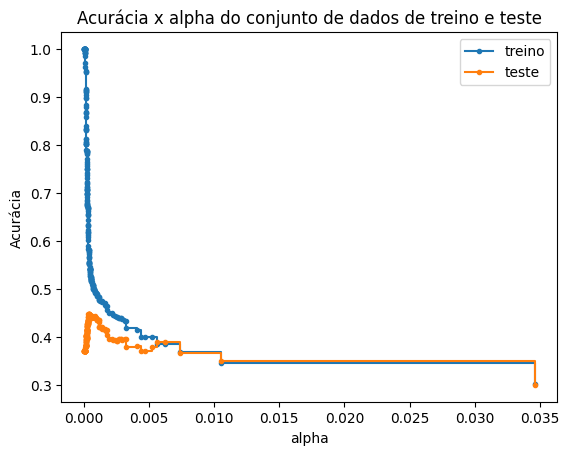

In [10]:
# 3.2 Calcule a acurácia de cada árvore na base de treinamento e de teste

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='.', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='.', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [11]:
# 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.00036355986671961156, random_state=2360873)

In [12]:
# 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

previsoes = melhor_arvore.predict(X_test)

taxa_acerto = accuracy_score(y_test, previsoes)

print('Melhor acurácia com as três variáveis: ', taxa_acerto)



Melhor acurácia com as três variáveis:  0.4472344757380387
